In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df= pd.read_csv('/content/Variables.csv',sep=';')

In [32]:
df.head()

,ano,mes,id,tamano,categoria,sexo,grupo,div,ro_t_1,ho_t_1,c_t_1,ht_t_1,ro,ho,c,ht
0,2023,7,984,2,G,1,1,1,8146341,195.00,8351617.00,195.00,9032064,203.00,9256676.00,203.00
1,2023,7,984,2,G,1,2,1,119995721,4492.00,122707290.00,4517.00,102745916,4209.00,105330382.00,4209.00
2,2023,7,984,2,G,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,7,984,2,G,1,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,7,984,2,G,1,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31644 entries, 0 to 31643
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ano        31644 non-null  int64  
 1   mes        31644 non-null  int64  
 2   id         31644 non-null  int64  
 3   tamano     31644 non-null  int64  
 4   categoria  31644 non-null  object 
 5   sexo       31644 non-null  int64  
 6   grupo      31644 non-null  int64  
 7   div        31644 non-null  int64  
 8   ro_t_1     16521 non-null  object 
 9   ho_t_1     16521 non-null  float64
 10  c_t_1      16521 non-null  float64
 11  ht_t_1     16521 non-null  float64
 12  ro         16547 non-null  object 
 13  ho         16547 non-null  float64
 14  c          16547 non-null  float64
 15  ht         16547 non-null  float64
dtypes: float64(6), int64(7), object(3)
memory usage: 3.9+ MB


(31644, 16)

Variables : Las variables Cuantitativa discreta son las de tipo int64 son 7. Las variables Cuantitativa continua son las de tipo float64 son 6. Las variables Cualitativas son la de tipo object son 3 .En el dataset hay  16 columnas y 31644 filas de las cuales se pueden ver, que los datos faltantes son casi la mitad de los datos de las columnas (rot_1,ho_t_1,c_t_1, ht_t_1, ro,ho,c,ht)

In [ ]:
df.columns

Index(['ano', 'mes', 'id', 'tamano', 'categoria', 'sexo', 'grupo', 'div',
       'ro_t_1', 'ho_t_1', 'c_t_1', 'ht_t_1', 'ro', 'ho', 'c', 'ht'],
      dtype='object')

##Se Eliminan de columnas innesarias para este analisis: 'ho_t_1','c_t_1', 'ht_t_1', 'ro', 'ho', 'c', 'ht'

In [33]:
df = df.drop(['ho_t_1','c_t_1', 'ht_t_1', 'ro', 'ho', 'c', 'ht'], axis=1)

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31644 entries, 0 to 31643
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ano        31644 non-null  int64 
 1   mes        31644 non-null  int64 
 2   id         31644 non-null  int64 
 3   tamano     31644 non-null  int64 
 4   categoria  31644 non-null  object
 5   sexo       31644 non-null  int64 
 6   grupo      31644 non-null  int64 
 7   div        31644 non-null  int64 
 8   ro_t_1     16521 non-null  object
dtypes: int64(7), object(2)
memory usage: 2.2+ MB


(31644, 9)

Las variables que utilizaremos son 9. Las que son de tipo : int64(7), object(2)

In [ ]:
df.isna().sum()

ano              0
mes              0
id               0
tamano           0
categoria        0
sexo             0
grupo            0
div              0
ro_t_1       15123
dtype: int64

En la variable ro_t_1   existe 15123 datos nan

##La columna 'ro_t_1' es de  tipo object la convertimos en float, para utilizar los datos que tiene.

In [34]:
df['ro_t_1'] = pd.to_numeric(df['ro_t_1'], errors='coerce', downcast='float')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31644 entries, 0 to 31643
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ano        31644 non-null  int64  
 1   mes        31644 non-null  int64  
 2   id         31644 non-null  int64  
 3   tamano     31644 non-null  int64  
 4   categoria  31644 non-null  object 
 5   sexo       31644 non-null  int64  
 6   grupo      31644 non-null  int64  
 7   div        31644 non-null  int64  
 8   ro_t_1     16501 non-null  float64
dtypes: float64(1), int64(7), object(1)
memory usage: 2.2+ MB


## Se cambia la variable ro_t_1 a valor float, para su analisis.

In [35]:
# Configura la opción de formato para mostrar números en formato decimal completo
pd.options.display.float_format = '{:.2f}'.format

# Ahora, cuando imprimas tu DataFrame, los números se mostrarán en formato decimal completo
df["ro_t_1"].describe()


count         16501.00
mean      125792124.03
std       426509955.24
min           13869.00
25%         4431906.00
50%        18639545.00
75%        75680098.00
max     10053364551.00
Name: ro_t_1, dtype: float64

Count: La cantidad de registros disponibles 16501 para la variable "ro_t_1".

##Medidas de tendencia central:"ro_t_1"





Mean: la renta promedio es 125792124.03.
Std: La desviación estándar es de 426509955.24 indica que los ingresos varían considerablemente en el conjunto de datos. Esto puede ser relevante para comprender la dispersión de ingresos y la amplitud de la distribución.

Min: El valor mínimo de "ro_t_1" es 13869.00. Este valor muestra la renta más bajo en el conjunto de datos. Sirve para ayudar a identificar a las personas  con los ingresos más bajos.

Max: El valor máximo de "ro_t_1" es 10053364551.00. Este valor representa la renta más alta y puede ayudar a identificar a las personas con las rentas más altas.






##Medidas de posicion


25%: Indica que el 25% de los datos tienen ingresos igual o inferior a 4431906.00. Puede ser útil para comprender cómo se distribuyen los ingresos en la parte inferior de la distribución.

50% (mediana):El valor 18639545,00 es el punto medio de las rentas. Sirve para comprender la distribución de ingresos en el conjunto de datos sin verse afectada por valores extremadamente altos o bajos.

75% : Indica que el 75% de las observaciones tienen ingresos iguales o inferiores a  75680098,00 .Sirve para comprender cómo se distribuyen los ingresos en la parte superior de la distribución.

La mediana 50% (18639545) es mucho menor que la media(125792124), lo que sugiere que podría haber valores atípicos o asimetría hacia la derecha  en la distribución de las rentas con  una distribución sesgada hacia la derecha.

Los percentiles 25(4.431.906) y 75(75.680.098) muestran una diferencia significativa en la renta. Esto indica una distribución sesgada hacia la derecha, con una concentración de observaciones en la parte inferior de la distribución y algunas observaciones con ingresos extremadamente altos en la parte superior. La mediana(18.639.545) se encuentra en un punto intermedio entre estos dos percentiles, lo que sugiere que la mayoría de las observaciones tienen ingresos por debajo de la media.

## Medidas de dispersion: "ro_t_1"

STD( 426509955.24):la desviación estándar es grande e indica que los datos están más dispersos alrededor de la media, lo que significa que hay una mayor variabilidad en los datos.

In [39]:
df4=df
df5=df
df6=df

# Hacer un replace para poner los nombres de las categorias
Se realiza este replace para tener una mejor visualizacion de los datos.

In [37]:
df['categoria'] = df['categoria'].replace({'B': 'Minería', 'C': 'Industria Manufacturera','D':'Suministro de Electricidad, Gas, Vapor y Aire Acondicionado',
                                           'E':'Suministro de Agua, Evacuación de Aguas Residuales, Gestión de Desechos y Descontaminación',
                                           'F':'Construccion','G':'Comercio','H':'Transporte y Almacenamiento','I':'Actividades de Alojamiento y Servicio de Comidas',
                                           'J':'Información y Comunicaciones','K':'Actividades Financieras y de Seguros','L':'Actividades Inmobiliarias',
                                           'M':'Actividades Profesionales, Científicas y Técnicas','N':'Actividades de Servicios Administrativos y de Apoyo',
                                           'O':'Administracion publica','P':'Enseñanza','Q':'Actividades de Atención de la Salud Humana y de Asistencia Social',
                                           'R':'Actividades Artísticas, de Entretenimiento y Recreativas'})

In [ ]:
clases = df['categoria'].nunique()
print(clases)

17


La columna categorias tiene 17 clases .

In [16]:
df1=df
df2=df1
df3=df


In [ ]:
df1.head()

,ano,mes,id,tamano,categoria,sexo,grupo,div,ro_t_1
0,2023,7,984,2,Comercio,1,1,1,8146341.00
1,2023,7,984,2,Comercio,1,2,1,119995721.00
2,2023,7,984,2,Comercio,1,3,1,NaN
3,2023,7,984,2,Comercio,1,4,1,NaN
4,2023,7,984,2,Comercio,1,5,1,NaN


## Se agrupa las categorias por ro_t_1
Para ver la suma de las rentas de cada categoria y determinar que categoria tiene mayor o menor renta sumada:

1.   mayor:Comercio
2.   menor:Actividades Financieras y de Seguros   




##¿ Cual es el rubro con la renta mas alta y la mas baja y la industria con la venta promedio?

In [17]:
df1['sexo'] = df1['sexo'].replace({1 : "mujeres", 2 : "hombres"})

Se reemplaza el nombre las clases 1 y 2 de la variable sexo por mujer y hombre para que el analisis sea mas claro

In [18]:
df1 = df1.groupby(['categoria'])['ro_t_1'].sum().reset_index()
df1 = df1.sort_values(by='ro_t_1', ascending=False)
print(df1)

                                            categoria          ro_t_1
7                              Administracion publica 335942079305.00
1                Actividades Financieras y de Seguros 215734428321.00
8                                            Comercio 214625029514.00
11                            Industria Manufacturera 209306298679.00
10                                          Enseñanza 194036996576.00
5   Actividades de Atención de la Salud Humana y d... 148608325652.00
13                                            Minería 144170853832.00
9                                        Construccion 130328966904.00
6   Actividades de Servicios Administrativos y de ... 119070664612.00
16                        Transporte y Almacenamiento  95131316997.00
12                       Información y Comunicaciones  71658947072.00
4    Actividades de Alojamiento y Servicio de Comidas  62120064760.00
3   Actividades Profesionales, Científicas y Técnicas  56084779924.00
15  Suministro de El

La categoria con la  renta mas alta es  Administracion publica con una renta de  335942079305 acumulada.
La categoria con la  renta mas baja es  Actividades Inmobiliarias con  10042005657.00 acumulada.

In [ ]:
df1.describe()

,ro_t_1
count,17.00
mean,122099755217.59
std,90315283397.29
min,10042005657.00
25%,56084779924.00
50%,119070664612.00
75%,194036996576.00
max,335942079305.00


La renta acumulada  media de todas las categorias es ro_t_1 : 122099755217. Lo que indica de el promedio  de los valores del conjunto de datos tiene un valor cercano a este numero.
Aunque, tambien se ve que la desviacion estandar es alta lo que demuestra una gran dispersion de los datos. Lo que puede ser por valores atipicos extremadamente altos  que estan el los registros.
 \

##Comparar renta mujeres y hombre (df2)

In [ ]:
df5['sexo'] = df5['sexo'].replace({1 : "mujeres", 2 : "hombres"})

In [ ]:
# Filtrar las filas donde 'sexo' sea igual a 'mujeres'
renta_mujeres = df5[df5['sexo'] == 'mujeres']
renta_hombres = df5[df5['sexo'] == 'hombres']
# Encontrar la renta más alta de las mujeres
renta_mas_alta_mujeres = renta_mujeres['ro_t_1'].max()
renta_mas_alta_hombres = renta_hombres['ro_t_1'].max()
# Mostrar la renta más alta de las mujeres
print(f"La renta más alta de las mujeres es: {renta_mas_alta_mujeres}")
print(f"La renta más alta de los hombres es: {renta_mas_alta_hombres}")


La renta más alta de las mujeres es: 8352488403.0
La renta más alta de los hombres es: 10053364551.0


La renta individual de los hombres es mayor que el de la mujeres dentro de los datos otorgados.

In [ ]:
# Filtrar las filas para hombres y encontrar el valor mínimo de 'ro_t_1'
minimo_hombres = df5[df5['sexo'] == 'hombres']['ro_t_1'].min()

# Filtrar las filas para mujeres y encontrar el valor mínimo de 'ro_t_1'
minimo_mujeres = df5[df5['sexo'] == 'mujeres']['ro_t_1'].min()

# Mostrar los valores mínimos para hombres y mujeres
print(f"Valor mínimo de 'ro_t_1' para hombres: {minimo_hombres}")
print(f"Valor mínimo de 'ro_t_1' para mujeres: {minimo_mujeres}")


Valor mínimo de 'ro_t_1' para hombres: 13869.0
Valor mínimo de 'ro_t_1' para mujeres: 14200.0


####La renta minima entre hombres y mujeres es similar, pero
los hombres tienen la renta mas baja del dataset

In [ ]:
dfdos = df5[['sexo', 'ro_t_1']].sort_values(by='ro_t_1', ascending=False)

# Mostrar el DataFrame ordenado
print(dfdos)


          sexo         ro_t_1
5428   hombres 10053364551.00
13078  hombres  9991954901.00
6598   hombres  8792647856.00
6589   mujeres  8352488403.00
28351  mujeres  7671504347.00
...        ...            ...
31639  hombres            NaN
31640  hombres            NaN
31641  hombres            NaN
31642  hombres            NaN
31643  hombres            NaN

[31644 rows x 2 columns]


####Se muestra el ro_t_1 mas alto del conjunto de datos que es 10053364551.00 que es del sexo Hombres

# A continuacion se sumaran las rentas segun sexo

In [ ]:
# Filtrar las filas donde 'sexo' es igual a 'mujeres' y luego sumar 'ro_t_1'
suma_mujeres = df2[df2['sexo'] == 'mujeres']['ro_t_1'].sum()
# Imprimir la suma de 'ro_t_1' para la clase 'mujeres'
suma_hombres = df2[df2['sexo'] == 'hombres']['ro_t_1'].sum()
print("Suma de 'ro_t_1' para la clase 'mujeres':", suma_mujeres)
print("Suma de 'ro_t_1' para la clase 'hombres':", suma_hombres)


Suma de 'ro_t_1' para la clase 'mujeres': 806546925125.0
Suma de 'ro_t_1' para la clase 'hombres': 1269148913574.0


La suma de las rentas de los hombres 1269148913574 es mayor que la renta de la mujeres 806546925125

# Se agrupan las categorias y diferencian los sexos y la cantidad .

In [ ]:
df2['sexo'] = df2['sexo'].replace({1 : "mujeres", 2 : "hombres"})
df2 = df2.groupby(['categoria','sexo'])['ro_t_1'].count()
print(df2)

categoria                                                                                   sexo   
Actividades Artísticas, de Entretenimiento y Recreativas                                    hombres     441
                                                                                            mujeres     368
Actividades Financieras y de Seguros                                                        hombres     414
                                                                                            mujeres     378
Actividades Inmobiliarias                                                                   hombres     200
                                                                                            mujeres     186
Actividades Profesionales, Científicas y Técnicas                                           hombres     394
                                                                                            mujeres     355
Actividades de Alojamiento y Servici

Se pueden ver la cantidad de hombres y mujeres contratados para cada categoria.

# Se suman las rentas segun sexo por cada categoria

In [ ]:
df3['sexo'] = df3['sexo'].replace({1: "mujeres", 2: "hombres"})

# Realizar la agrupación y suma de 'ro_t_1' por 'categoria' y 'sexo'
df2 = df3.groupby(['categoria', 'sexo'])['ro_t_1'].sum().reset_index()

# Imprimir el resultado
print(df2)


                                            categoria     sexo          ro_t_1
0   Actividades Artísticas, de Entretenimiento y R...  hombres  10039427039.00
1   Actividades Artísticas, de Entretenimiento y R...  mujeres   5100241051.00
2                Actividades Financieras y de Seguros  hombres 114171857565.00
3                Actividades Financieras y de Seguros  mujeres 101562570756.00
4                           Actividades Inmobiliarias  hombres   6725856317.00
5                           Actividades Inmobiliarias  mujeres   3316149340.00
6   Actividades Profesionales, Científicas y Técnicas  hombres  40216284710.00
7   Actividades Profesionales, Científicas y Técnicas  mujeres  15868495214.00
8    Actividades de Alojamiento y Servicio de Comidas  hombres  27073422800.00
9    Actividades de Alojamiento y Servicio de Comidas  mujeres  35046641960.00
10  Actividades de Atención de la Salud Humana y d...  hombres  54341007376.00
11  Actividades de Atención de la Salud Humana y d..

Se puede ver cada categoria agrupada, tambien se puede observar el total de las rentas de mujeres y hombres por cada categoria . Donde podemos ver que en  Actividades de Atención de la Salud Humana los hombres tienen un total de rentas acumuladas de 54341007376.00 que es menor que el de las mujeres 94267318276.
Tambien en Administracion publica los hombres tiene rentas acumuladas de 146780398685.00 menor que las mujeres 189161680620.00

#Grafico de barras

<ipython-input-101-0b294c4c6527>:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


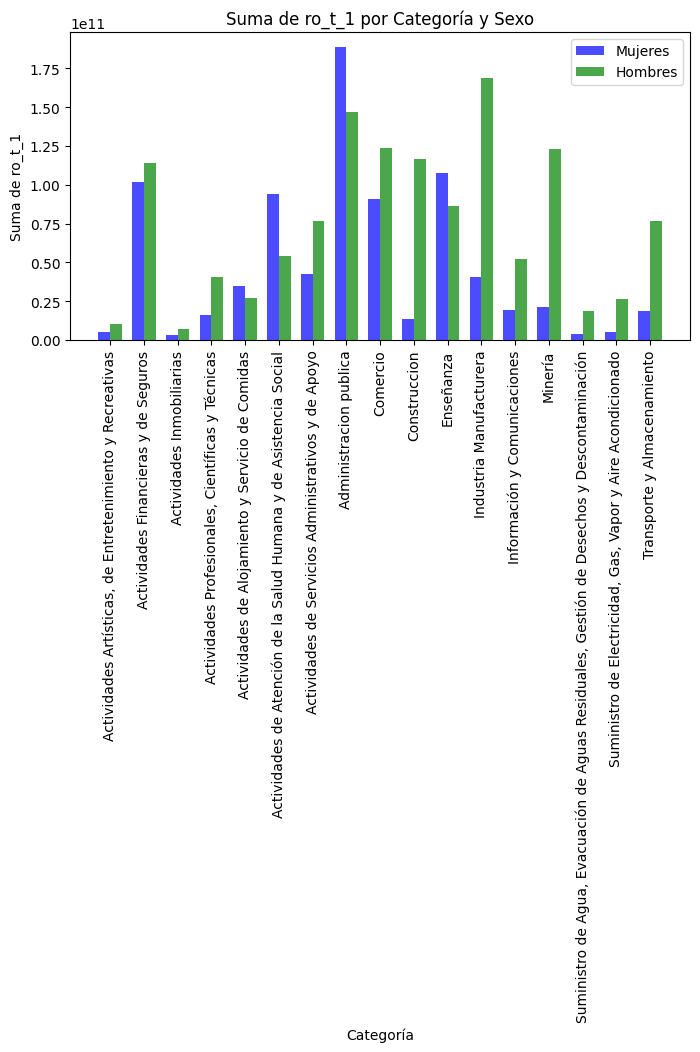

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 4))

# Extraer las categorías y las sumas de 'ro_t_1' para mujeres y hombres
categorias = df2['categoria'].unique()
ro_t_1_mujeres = df2[df2['sexo'] == 'mujeres']['ro_t_1']
ro_t_1_hombres = df2[df2['sexo'] == 'hombres']['ro_t_1']

# Configurar el ancho de las barras
bar_width = 0.35
index = range(len(categorias))

# Crear las barras para mujeres y hombres
plt.bar(index, ro_t_1_mujeres, bar_width, label='Mujeres', color='b', alpha=0.7)
plt.bar([i + bar_width for i in index], ro_t_1_hombres, bar_width, label='Hombres', color='g', alpha=0.7)

# Configurar el eje x
plt.xlabel('Categoría')
plt.xticks([i + bar_width / 2 for i in index], categorias, rotation=90)

# Configurar el eje y
plt.ylabel('Suma de ro_t_1')
plt.title('Suma de ro_t_1 por Categoría y Sexo')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En este histograma podemos analizar la suma de las rentas de cada categoria por mujeres y hombres.Donde podemos ver que las rentas de mujeres en administracion publica es la mas alta dentro de todas las categorias. La Industria manufacturera es la que refleja una diferencia amplia en las rentas donde hombres es mas alta que  mujeres.

## Comparar renta profesionales(grupo 2) y tecnicos(grupo 3) (df3)



In [ ]:
df3.head()

,ano,mes,id,tamano,categoria,sexo,grupo,div,ro_t_1
0,2023,7,984,2,Comercio,mujeres,1,1,8146341.00
1,2023,7,984,2,Comercio,mujeres,2,1,119995721.00
2,2023,7,984,2,Comercio,mujeres,3,1,NaN
3,2023,7,984,2,Comercio,mujeres,4,1,NaN
4,2023,7,984,2,Comercio,mujeres,5,1,NaN


In [ ]:
# Este codigo deja solo las clases 2 y 3 que estan en la variable grupo
df3= df3[df3['grupo'].isin([2, 3])]

In [ ]:
df3['grupo'] = df3['grupo'].replace({2 : "profesional", 3 : "tecnico"})

#Se agrupan las categorias y se separan por profesional y tecnico mostrando la sumatoria de las rentas de cada uno.

In [ ]:
df3 = df3.groupby(['categoria', 'grupo'])['ro_t_1'].sum().reset_index()
df3.head(35)

,categoria,grupo,ro_t_1
0,"Actividades Artísticas, de Entretenimiento y R...",profesional,4172547216.00
1,"Actividades Artísticas, de Entretenimiento y R...",tecnico,3771292640.00
2,Actividades Financieras y de Seguros,profesional,118812073479.00
3,Actividades Financieras y de Seguros,tecnico,30155219513.00
4,Actividades Inmobiliarias,profesional,3219512245.00
5,Actividades Inmobiliarias,tecnico,1830173611.00
6,"Actividades Profesionales, Científicas y Técnicas",profesional,30489811535.00
7,"Actividades Profesionales, Científicas y Técnicas",tecnico,7181103310.00
8,Actividades de Alojamiento y Servicio de Comidas,profesional,7002060160.00
9,Actividades de Alojamiento y Servicio de Comidas,tecnico,6439312200.00


# Grafico de barras

<ipython-input-109-6de404ba70a4>:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


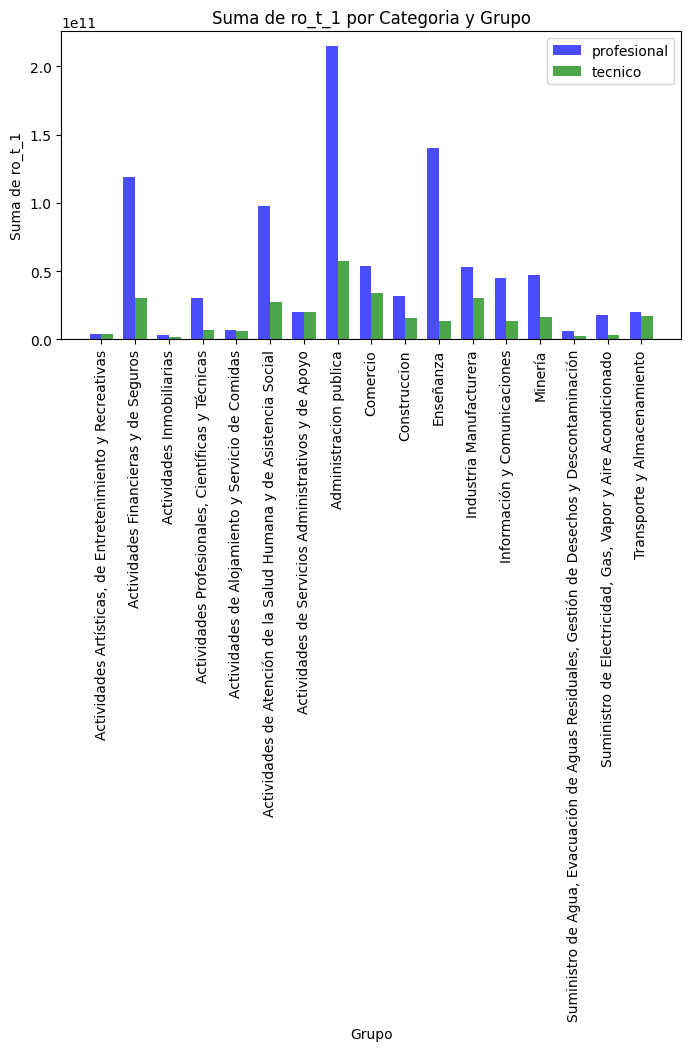

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 4))

# Extraer las categorías y las sumas de 'ro_t_1' para profesional y tecnico
categorias = df3['categoria'].unique()
ro_t_1_profesional = df3[df3['grupo'] == 'profesional']['ro_t_1']
ro_t_1_tecnico = df3[df3['grupo'] == 'tecnico']['ro_t_1']

# Configurar el ancho de las barras
bar_width = 0.35
index = range(len(categorias))

# Crear las barras para mujeres y hombres
plt.bar(index, ro_t_1_profesional, bar_width, label='profesional', color='b', alpha=0.7)
plt.bar([i + bar_width for i in index], ro_t_1_tecnico, bar_width, label='tecnico', color='g', alpha=0.7)

# Configurar el eje x
plt.xlabel('Grupo')
plt.xticks([i + bar_width / 2 for i in index], categorias, rotation=90)

# Configurar el eje y
plt.ylabel('Suma de ro_t_1')
plt.title('Suma de ro_t_1 por Categoria y Grupo')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En todas las categorias de la actividad economica los profesionales son los que tienen rentas mas altas que los tecnico. Pero en algunas categorias no hay gran diferencia como en Actividades artisticas , actividades Inmobiliarias, Actividades de servicios administrativos y de apoyo . En Enseñanza y administracion publica los profesionales son los que acumulan mayor renta.

#II Parte : Otros requerimientos

###1- Dejar las columnas categoricas con sus respectivas categorias en string
###2- agrupar los datos de remuneracion por categoria , sexo y grupo
###3- indicar estadisticos descriptivos y de posicion y dispersion para esas 3 dimensiones de datos , en caso de los estadisticos central, indicar categoria, sexo y grupo


In [77]:
df9=df

In [78]:
df9.head()

,ano,mes,id,tamano,categoria,sexo,grupo,div,ro_t_1
0,2023,7,984,2,Comercio,mujeres,Directores y gerentes,1,8146341.00
1,2023,7,984,2,Comercio,mujeres,Profesionales,1,119995721.00
2,2023,7,984,2,Comercio,mujeres,Tecnicos,1,NaN
3,2023,7,984,2,Comercio,mujeres,Trabajadores de apoyo administrativo,1,NaN
4,2023,7,984,2,Comercio,mujeres,"Trabajadores de servicios personales, protecci...",1,NaN


#Columnas categoricas con sus respectivas categorias en string

In [79]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31644 entries, 0 to 31643
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ano        31644 non-null  int64  
 1   mes        31644 non-null  int64  
 2   id         31644 non-null  int64  
 3   tamano     31644 non-null  int64  
 4   categoria  31644 non-null  object 
 5   sexo       31644 non-null  object 
 6   grupo      31644 non-null  object 
 7   div        31644 non-null  int64  
 8   ro_t_1     16501 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 2.2+ MB


In [49]:
df9['grupo'] = df9['grupo'].replace({1 : 'Directores y gerentes', 2 : 'Profesionales', 3 : 'Tecnicos', 4 : 'Trabajadores de apoyo administrativo',
                                   5 : 'Trabajadores de servicios personales, proteccion y seguridad', 6 : 'Vendedores, Promotores y modelos',
                                   7 : 'Operarios manuales y artesanos', 8 : 'Operadores y montadores de instalaciones y maquinas',
                                   9 : 'Trabajadores no especializados'})

In [57]:
df9.head()

,ano,mes,id,tamano,categoria,sexo,grupo,div,ro_t_1
0,2023,7,984,2,Comercio,mujeres,Directores y gerentes,1,8146341.00
1,2023,7,984,2,Comercio,mujeres,Profesionales,1,119995721.00
2,2023,7,984,2,Comercio,mujeres,Tecnicos,1,NaN
3,2023,7,984,2,Comercio,mujeres,Trabajadores de apoyo administrativo,1,NaN
4,2023,7,984,2,Comercio,mujeres,"Trabajadores de servicios personales, protecci...",1,NaN


In [58]:
df9=df.dropna()

In [59]:
df9.head()

,ano,mes,id,tamano,categoria,sexo,grupo,div,ro_t_1
0,2023,7,984,2,Comercio,mujeres,Directores y gerentes,1,8146341.00
1,2023,7,984,2,Comercio,mujeres,Profesionales,1,119995721.00
9,2023,7,984,2,Comercio,hombres,Directores y gerentes,1,73837288.00
10,2023,7,984,2,Comercio,hombres,Profesionales,1,236979266.00
18,2023,7,952,3,Minería,mujeres,Directores y gerentes,1,705533353.00


## Se agrupan los datos de remuneracion por grupo .
La renta acumulada mas baja es de los  Trabajadores de servicios personales, proteccion y seguridad   con la suma de  45468876329.00. y mas alta son los profesionales con la rentas acumuladas de 910890853680.00.que es aproximadamente 20 veces la suma de la renta mas baja .


In [70]:
df9 = df.groupby(['grupo'])['ro_t_1'].sum()
print(df9)

grupo
Directores y gerentes                                          179034076397.00
Operadores y montadores de instalaciones y maquinas            136190475290.00
Operarios manuales y artesanos                                 154238976603.00
Profesionales                                                  910890853680.00
Tecnicos                                                       300673033864.00
Trabajadores de apoyo administrativo                           174362713506.00
Trabajadores de servicios personales, proteccion y seguridad    45468876329.00
Trabajadores no especializados                                 125873256084.00
Vendedores, Promotores y modelos                                48963576946.00
Name: ro_t_1, dtype: float64


## Se agrupa los datos de renta por categoria

In [72]:
df9 = df.groupby(['categoria'])['ro_t_1'].sum().reset_index()
df9 = df9.sort_values(by='ro_t_1', ascending=False)
print(df9)

                                            categoria          ro_t_1
7                              Administracion publica 335942079305.00
1                Actividades Financieras y de Seguros 215734428321.00
8                                            Comercio 214625029514.00
11                            Industria Manufacturera 209306298679.00
10                                          Enseñanza 194036996576.00
5   Actividades de Atención de la Salud Humana y d... 148608325652.00
13                                            Minería 144170853832.00
9                                        Construccion 130328966904.00
6   Actividades de Servicios Administrativos y de ... 119070664612.00
16                        Transporte y Almacenamiento  95131316997.00
12                       Información y Comunicaciones  71658947072.00
4    Actividades de Alojamiento y Servicio de Comidas  62120064760.00
3   Actividades Profesionales, Científicas y Técnicas  56084779924.00
15  Suministro de El

## Se agrupan los datos de renta por sexo
Donde se puede ver que los hombres tienen rentas acumuladas mas altas que las mujeres .

In [74]:
df9 = df.groupby(['sexo'])['ro_t_1'].sum().reset_index()
df9 = df9.sort_values(by='ro_t_1', ascending=False)
print(df9)

      sexo           ro_t_1
0  hombres 1269148913574.00
1  mujeres  806546925125.00


###Indicar estadisticos descriptivos y de medidas de  posicion(percentiles, deciles, cuartiles, mediana) y medidas dispersion (std, varianza,rango, cuartiles,percentiles)para esas 3 dimensiones de datos , en caso de los estadisticos medidas de tendencia central(media,moda,mediana), indicar categoria, sexo y grupo

#Categoria:

In [ ]:
from IPython.display import display

# Reemplaza df9 con tu DataFrame
display(df9)


In [93]:
percentiles = [25,50,75]  # Puedes ajustar estos valores según tus necesidades

# Agrupa por 'categoria' y calcula las estadísticas, incluyendo percentiles
resultados = df.groupby('categoria')['ro_t_1'].agg(
    media='mean',
    mediana='median',
    minimo='min',
    maximo='max',
    std='std',
    varianza='var',
    percentil_25=lambda x: x.quantile(0.25),
    percentil_50=lambda x: x.quantile(0.50),
    percentil_75=lambda x: x.quantile(0.75)
).reset_index()

display(resultados)


,categoria,media,mediana,minimo,maximo,std,varianza,percentil_25,percentil_50,percentil_75
0,"Actividades Artísticas, de Entretenimiento y R...",18714052.03,6132527.00,18345.00,1011850374.00,56747100.82,3220233451297439.50,1771948.00,6132527.00,15967581.00
1,Actividades Financieras y de Seguros,272391954.95,41108388.50,35134.00,10053364551.00,883098091.67,779862239505272320.00,7560525.50,41108388.50,181897873.00
2,Actividades Inmobiliarias,26015558.70,5288425.00,21793.00,493854604.00,61919096.25,3833974479991126.00,1609726.75,5288425.00,19285610.00
3,"Actividades Profesionales, Científicas y Técnicas",74879545.96,9976201.00,24445.00,2297269274.00,202574585.50,41036462689198784.00,2437774.00,9976201.00,45435491.00
4,Actividades de Alojamiento y Servicio de Comidas,78732654.96,12152242.00,14200.00,4059795172.00,272695934.68,74363072792804656.00,3260475.00,12152242.00,38257261.00
5,Actividades de Atención de la Salud Humana y d...,164208094.64,23684197.00,69414.00,4500426560.00,450890515.38,203302256863813408.00,5106253.00,23684197.00,108178499.00
6,Actividades de Servicios Administrativos y de ...,92231343.62,17686551.00,106546.00,5184734096.00,280954619.31,78935498112577184.00,4315742.00,17686551.00,69070493.50
7,Administracion publica,201042536.99,45050092.00,63996.00,7671504347.00,615336641.68,378639182595009216.00,15047370.50,45050092.00,122028619.00
8,Comercio,125953655.82,23011440.00,15206.00,3909720500.00,318844210.32,101661630453417424.00,4802992.75,23011440.00,101988458.50
9,Construccion,69250248.09,10890378.00,13869.00,6198698832.00,260919347.97,68078906142762840.00,2938058.75,10890378.00,43136834.25


####La categoría "Actividades Financieras y de Seguros" tiene una amplia variación en las rentas, con algunos valores extremadamente altos que afectan la media y la mediana. La desviación estándar y la varianza también son altas, lo que indica la dispersión de los datos.

####Se puede observar que el valor mínimo de renta en esta categoría es de 35,134.0. Esto representa la renta más baja observada en esta categoría y el valor máximo de renta es de 10,053,364,551.0. Esto representa la renta más alta observada en esta categoría y muestra una gran variabilidad en los datos.

#Sexo

In [ ]:
df9 = df.groupby('sexo').agg({'ro_t_1': ['mean', 'median', 'min', 'max','std','var']})
display(df9)


In [94]:
percentiles = [25,50,75]  # Puedes ajustar estos valores según tus necesidades

# Agrupa por 'categoria' y calcula las estadísticas, incluyendo percentiles
resultados = df.groupby('sexo')['ro_t_1'].agg(
    media='mean',
    mediana='median',
    minimo='min',
    maximo='max',
    std='std',
    varianza='var',
    percentil_25=lambda x: x.quantile(0.25),
    percentil_50=lambda x: x.quantile(0.50),
    percentil_75=lambda x: x.quantile(0.75)
).reset_index()

display(resultados)

,sexo,media,mediana,minimo,maximo,std,varianza,percentil_25,percentil_50,percentil_75
0,hombres,142857824.58,24672245.00,13869.00,10053364551.00,448796882.30,201418641558391584.00,5800758.75,24672245.00,94127928.75
1,mujeres,105887741.25,13684236.00,14200.00,8352488403.00,398052037.29,158445424388166560.00,3368985.00,13684236.00,54014303.00


#### El minimo nos indica la renta mas baja que corresponde a una persona de sexo hombre .
#### hombres: la media es mucho mas alta que la mediana lo que sugiere que los datos para hombres indican una mayor variabilidad en las rentas, con la presencia de valores atípicos extremadamente altos que influyen en la media. Esto ocurre porque  un pequeño grupo de hombres tiene rentas muy elevadas. Por otro lado, las rentas de las mujeres también tienen una diferencia entre la media y la mediana, pero en menor medida, lo que sugiere una distribución menos sesgada en comparación con los hombres.

####Las métricas de renta para mujeres también muestran diferencias entre la media y la mediana, pero en menor medida que en el caso de los hombres. Las mujeres tienen una media de renta de aproximadamente 105887741,25 y una mediana de 13684236.0. Esto sugiere que aunque la media es más alta que la mediana, la dispersión de las rentas no es tan extrema como en el grupo de hombres.

####percentil 25 nos indica que el 25 % de las mujeres esta dentro del primer cuartil con una renta menor o igual a 3368985.

#GRUPO

In [ ]:
df9 = df.groupby('grupo').agg({'ro_t_1': ['mean', 'median', 'min', 'max','std','var']})
display(df9)

In [103]:
percentiles = [25,50,75]  # Puedes ajustar estos valores según tus necesidades

# Agrupa por 'categoria' y calcula las estadísticas, incluyendo percentiles
resultados = df.groupby('grupo')['ro_t_1'].agg(
    media='mean',
    mediana='median',
    minimo='min',
    maximo='max',
    std='std',
    varianza='var',
    percentil_25=lambda x: x.quantile(0.25),
    percentil_50=lambda x: x.quantile(0.50),
    percentil_75=lambda x: x.quantile(0.75)
).reset_index()

display(resultados)

,grupo,media,mediana,minimo,maximo,std,varianza,percentil_25,percentil_50,percentil_75
0,Directores y gerentes,73737263.75,21877986.50,178719.00,5220897350.00,205145582.63,42084710073141688.00,7878528.75,21877986.50,63947436.25
1,Operadores y montadores de instalaciones y maq...,116302711.61,11353570.00,23335.00,4145082961.00,362172723.41,131169081580994032.00,2190893.00,11353570.00,56426234.50
2,Operarios manuales y artesanos,135060399.83,15198716.50,14200.00,6929493221.00,458879615.73,210570501732941472.00,2871880.25,15198716.50,76395168.75
3,Profesionales,307421820.34,49187412.00,45833.00,10053364551.00,793079526.60,628975135518474112.00,10223455.00,49187412.00,238392244.00
4,Tecnicos,108742507.73,23027167.00,13869.00,6995663730.00,320115202.93,102473743149219952.00,5912920.00,23027167.00,81699636.00
5,Trabajadores de apoyo administrativo,59611184.10,14583088.00,56269.00,3052763077.00,170286882.04,28997622195055104.00,3606392.00,14583088.00,47457644.00
6,"Trabajadores de servicios personales, protecci...",62031209.18,6496676.00,134880.00,3108092093.00,209608183.51,43935590595691008.00,1594770.00,6496676.00,31484330.00
7,Trabajadores no especializados,66494060.27,9161304.00,18345.00,4059795172.00,213015613.62,45375651644387392.00,2012000.00,9161304.00,42643518.00
8,"Vendedores, Promotores y modelos",101795378.27,17438511.00,15206.00,2471626622.00,243832539.40,59454307271948392.00,3238384.00,17438511.00,77585843.00


####Profesionales: Son los que tiene el maximo mal alto e  indican una mayor variabilidad en las rentas, con la presencia de valores atípicos extremadamente altos que influyen en la media, lo que sesga la distribución hacia la derecha y hace que la mediana sea significativamente más baja que la media.Esto puede deberse a que existe un pequeño grupo de profesionales que tiene rentas muy altas .






#### En el grupo de los tecnicos , la renta promedio es menor que en el grupo de Profesionales, pero la mediana también es menor, lo que sugiere una distribución sesgada hacia valores más bajos. La desviación estándar es moderada en comparación con el grupo de Profesionales.

####El grupo de Operarios manuales y artesanos su mediana es relativamente baja en comparación con la media, como en el  significa que la mayoría de los valores se agrupan en la parte inferior de la escala de renta, y hay relativamente pocos valores que son mucho más altos, lo que nuevamente indica un sesgo hacia valores más bajos.
####Este sesgo puede ser indicativo de desigualdad en la distribución de las rentas , ya que  la mayoría de las personas en ese grupo ganan menos, pero un pequeño número de individuos ganan mucho más, lo que aumenta la media pero no afecta significativamente la mediana.





